<a href="https://colab.research.google.com/github/dzervenes/dzervenes.github.io/blob/master/e_Portfolio_Activity_Jaccard_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The table shows the pathological test results for three individuals.

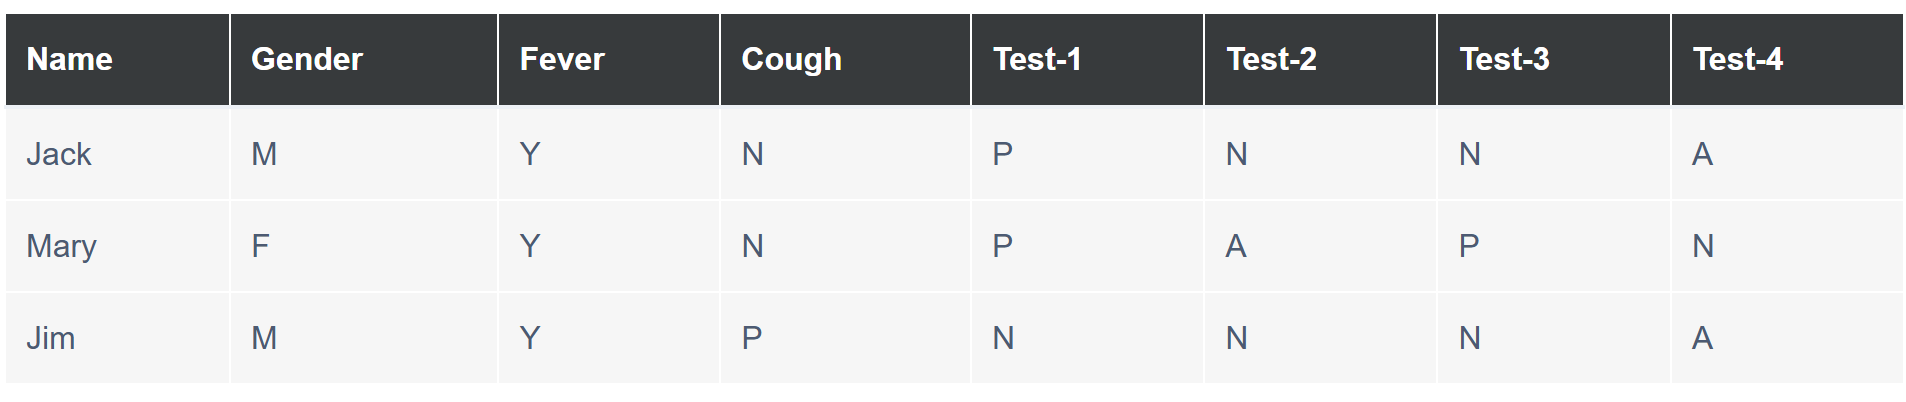

**Defining the test data for individuals**

Here, I create a dataset for three individuals: Jack, Mary, and Jim. The dataset includes details such as gender, fever status, cough status, and the results of four tests (Test-1 to Test-4). Each person's information is stored as a dictionary, with their name as the key and their attributes as key-value pairs. This structured data will serve as input for calculating pairwise Jaccard coefficients.

In [ ]:
data = {
    "Jack": {"Gender": "M", "Fever": "Y", "Cough": "N", "Test-1": "P", "Test-2": "N", "Test-3": "N", "Test-4": "A"},
    "Mary": {"Gender": "F", "Fever": "Y", "Cough": "N", "Test-1": "P", "Test-2": "A", "Test-3": "P", "Test-4": "N"},
    "Jim":  {"Gender": "M", "Fever": "Y", "Cough": "P", "Test-1": "N", "Test-2": "N", "Test-3": "N", "Test-4": "A"}
}

**Defining a function to calculate the Jaccard coefficient**

In this section, I define the *jaccard_coefficient* function, which calculates the similarity between two individuals based on their attributes in the dataset. The function compares the attribute values of the two individuals, counting matches (intersection) and the total number of relevant attributes (union). It then computes and returns the Jaccard coefficient, which is the ratio of the intersection to the union, excluding attributes marked as "N" (typically standing for "Not Applicable" or "Negative").

In [ ]:
def jaccard_coefficient(person1, person2, data):

    attributes1 = data[person1]
    attributes2 = data[person2]

    intersection = sum(1 for attr1, attr2 in zip(attributes1.values(), attributes2.values()) if attr1 == attr2 and attr1 != 'N')
    union = sum(1 for attr1, attr2 in zip(attributes1.values(), attributes2.values()) if attr1 != 'N' or attr2 != 'N')

    return intersection / union if union != 0 else 0

**Specifying pairs**

In this section, I define the pairs of individuals (*Jack*, *Mary*, and *Jim*) for which the Jaccard coefficients will be calculated. These pairs represent the combinations of individuals to be compared based on their attributes in the dataset.

In [ ]:
pairs = [("Jack", "Mary"), ("Jack", "Jim"), ("Jim", "Mary")]

**Results for Pairwise Comparison**

This section iterates through the defined pairs of individuals and calculates the Jaccard coefficient for each pair using the *jaccard_coefficient* function

In [ ]:
for pair in pairs:
    jc = jaccard_coefficient(pair[0], pair[1], data)
    print(f"Jaccard Coefficient for {pair[0]} and {pair[1]}: {jc:.2f}")

Jaccard Coefficient for Jack and Mary: 0.33
Jaccard Coefficient for Jack and Jim: 0.60
Jaccard Coefficient for Jim and Mary: 0.14


**Key findings**

* Jack and Jim have the highest similarity with a Jaccard coefficient of 0.60, indicating a relatively high overlap in their attributes.

* Jack and Mary have a moderate similarity with a Jaccard coefficient of 0.33, reflecting some shared attributes but also significant differences.

* Jim and Mary have the lowest similarity with a Jaccard coefficient of 0.14, suggesting minimal overlap in their attributes.

**Jaccard Coefficient Heatmap**

This section visualizes the pairwise Jaccard similarity coefficients as a heatmap. A blue gradient is used to represent the values, with annotations displaying the exact coefficients. The heatmap provides a clear and visually appealing way to analyse the relationships between the individuals.

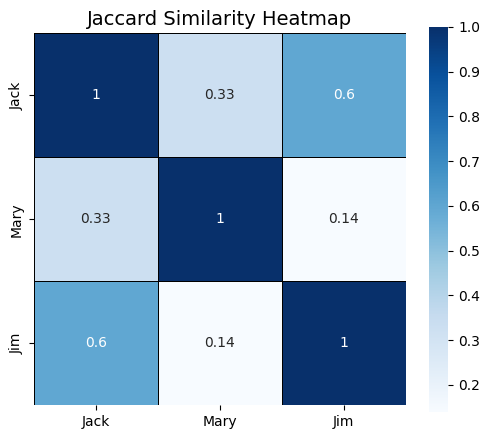

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


names = ["Jack", "Mary", "Jim"]
similarity_matrix = np.array([
    [1.00, 0.33, 0.60],
    [0.33, 1.00, 0.14],
    [0.60, 0.14, 1.00]
])

plt.figure(figsize=(6, 5))
sns.heatmap(similarity_matrix, annot=True, xticklabels=names, yticklabels=names,
            cmap="Blues", cbar=True, square=True, linewidths=0.5, linecolor='black')
plt.title("Jaccard Similarity Heatmap", fontsize=14)
plt.show()

**Refining Jaccard Coefficients by Excluding Gender**

The highest Jaccard coefficient, 0.60, is observed between Jack and Jim. This prompted me to consider whether their shared gender (both being male) might be influencing this result. To ensure that the analysis focuses solely on health-related attributes, I decided to recalculate the Jaccard coefficients after excluding gender from the dataset. This approach eliminates potential bias and provides a clearer perspective on the similarity between individuals based purely on their health data.

Jaccard Coefficient for Jack and Mary: 0.40
Jaccard Coefficient for Jack and Jim: 0.50
Jaccard Coefficient for Jim and Mary: 0.17


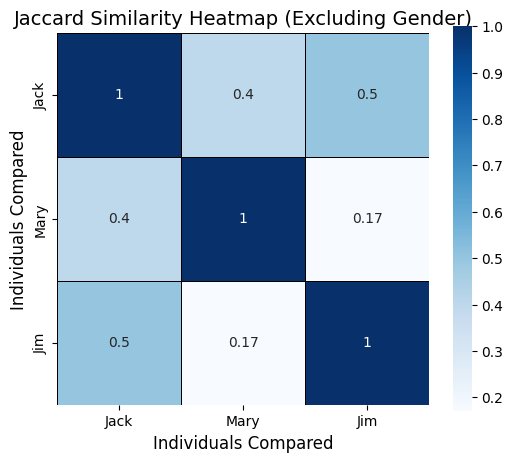

In [ ]:
data = {
    "Jack": {"Fever": "Y", "Cough": "N", "Test-1": "P", "Test-2": "N", "Test-3": "N", "Test-4": "A"},
    "Mary": {"Fever": "Y", "Cough": "N", "Test-1": "P", "Test-2": "A", "Test-3": "P", "Test-4": "N"},
    "Jim":  {"Fever": "Y", "Cough": "P", "Test-1": "N", "Test-2": "N", "Test-3": "N", "Test-4": "A"}
}

for pair in pairs:
    jc = jaccard_coefficient(pair[0], pair[1], data)
    print(f"Jaccard Coefficient for {pair[0]} and {pair[1]}: {jc:.2f}")

    names = ["Jack", "Mary", "Jim"]
similarity_matrix = np.array([
    [1.00, 0.40, 0.50],
    [0.40, 1.00, 0.17],
    [0.50, 0.17, 1.00]
])

plt.figure(figsize=(6, 5))
sns.heatmap(similarity_matrix, annot=True, xticklabels=names, yticklabels=names,
            cmap="Blues", cbar=True, square=True, linewidths=0.5, linecolor='black')
plt.title("Jaccard Similarity Heatmap (Excluding Gender)", fontsize=14)
plt.xlabel("Individuals Compared", fontsize=12)
plt.ylabel("Individuals Compared", fontsize=12)
plt.show()

**Key Observations**

Jack and Jim continue to exhibit relatively high similarity, with a coefficient of 0.50. Although this is slightly lower than the original value of 0.60, it indicates that their shared health attributes, rather than gender, play a significant role in their similarity.

Jack and Mary show a moderate similarity with a coefficient of 0.40, which is an increase compared to the previous calculation. This suggests that the removal of gender, a differentiating factor, has brought their health-related attributes into sharper focus.

Jim and Mary, with a coefficient of 0.17, remain the least similar pair. This result reflects minimal overlap in their health attributes, consistent with the previous analysis.

By focusing on health-specific data and excluding gender, the updated heatmap reveals more meaningful and unbiased relationships between individuals. It emphasizes that Jack and Jim's similarity is largely driven by shared health characteristics rather than their gender.